## Initial Setup

In [ ]:
# VDOT dataset for Richmond through 2019 - 2021
# https://www.vdot.virginia.gov/doing-business/technical-guidance-and-support/traffic-operations/traffic-counts/

In [ ]:
# VDOT Crash interactive map
# https://www.treds.virginia.gov/Mapping/Map/CrashesByJurisdiction
# NOTE: saves as Microsoft Excel 97-2003 Worksheet and is incompatible with read_excel
# NOTE: please open and resave as an updated .xlsx for compatability

In [ ]:
# Weather datasets for rainfall and snowfall
# https://www.weather.gov/wrh/climate?wfo=akq

In [ ]:
import os
# List all files in the current working directory
print(os.listdir('/content'))
# Total files necessary
# 3 aadt VDOT excel files
# 9 crash data files for counties around Richmond

['.config', 'CrashesChesterfield2019.xlsx', 'CrashesHanover2020.xlsx', 'CrashesChesterfield2020.xlsx', 'CrashesHanover2019.xlsx', 'aadt_127_richmond_2019.xls', 'CrashesHanover2021.xlsx', 'CrashesHenrico2021.xlsx', 'CrashesHenrico2019.xlsx', 'aadt_127_richmond_2021.xlsx', 'CrashesChesterfield2021.xlsx', 'aadt_127_richmond_2020.xlsx', 'CrashesHenrico2020.xlsx', 'sample_data']


1. Merging VDOT Data set 2019-2021 together

In [ ]:
import pandas as pd

# Read the Excel files directly from the Colab file directory
df1 = pd.read_excel('aadt_127_richmond_2019.xls', skiprows=6, header=0)
df2 = pd.read_excel('aadt_127_richmond_2020.xlsx', skiprows=6, header=0)
df3 = pd.read_excel('aadt_127_richmond_2021.xlsx', skiprows=6, header=0)

df1['Year'] = 2019  # For the 2019 dataset
df2['Year'] = 2020  # For the 2020 dataset
df3['Year'] = 2021  # For the 2021 dataset

# Concatenate all DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save the combined DataFrame to a new Excel file
combined_df.to_excel('/content/combined_file.xlsx', index=False)

In [ ]:
# Optional: Download the resulting file
from google.colab import files
#files.download('/content/combined_file.xlsx')

In [ ]:
# Optional: Read in the combined_file instead of each individual file
# combined_df = pd.read_excel('/content/combined_file.xlsx')
# func deprecated as df is not brought in properly

2. Merging Weather Dataset together

In [ ]:
# Encoding data from above source
# 2018 data is deprecated and is not fed into the model
precip_data = {
    "Year": [2018, 2019, 2020, 2021],
    "Jan": [3.41, 2.62, 3.59, 3.58],
    "Feb": [2.04, 3.69, 3.59, 5.12],
    "Mar": [2.33, 3.86, 2.66, 3.89],
    "Apr": [3.58, 3.08, 4.71, 1.34],
    "May": [10.35, 5.83, 1.90, 2.33],
    "Jun": [13.32, 5.14, 5.25, 4.02],
    "Jul": [5.68, 6.22, 2.80, 6.59],
    "Aug": [3.35, 2.29, 15.34, 7.21],
    "Sep": [4.53, 0.42, 6.92, 5.79],
    "Oct": [6.04, 4.66, 5.63, 5.61],
    "Nov": [5.65, 1.80, 4.43, 0.70],
    "Dec": [3.45, 3.27, 6.70, 1.07],
    "Total": [63.73, 42.88, 63.52, 47.25]
}

# Create a DataFrame
weather_df = pd.DataFrame(precip_data)

In [ ]:
weather_df.head(4)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2018,3.41,2.04,2.33,3.58,10.35,13.32,5.68,3.35,4.53,6.04,5.65,3.45,63.73
1,2019,2.62,3.69,3.86,3.08,5.83,5.14,6.22,2.29,0.42,4.66,1.80,3.27,42.88
2,2020,3.59,3.59,2.66,4.71,1.90,5.25,2.80,15.34,6.92,5.63,4.43,6.70,63.52
3,2021,3.58,5.12,3.89,1.34,2.33,4.02,6.59,7.21,5.79,5.61,0.70,1.07,47.25


3. Crash dataset setup

In [ ]:
#!pip install pyxlsb
# Read the Excel files directly from the Colab file directory

# Henrico County Crash
df0 = pd.read_excel('CrashesHenrico2019.xlsx')
df1 = pd.read_excel('CrashesHenrico2020.xlsx')
df2 = pd.read_excel('CrashesHenrico2021.xlsx')

# Hanover County Crash
df3 = pd.read_excel('CrashesHanover2019.xlsx')
df4 = pd.read_excel('CrashesHanover2020.xlsx')
df5 = pd.read_excel('CrashesHanover2021.xlsx')

# Chesterfield County Crash
df6 = pd.read_excel('CrashesChesterfield2019.xlsx')
df7 = pd.read_excel('CrashesChesterfield2020.xlsx')
df8 = pd.read_excel('CrashesChesterfield2021.xlsx')

# Concatenate all DataFrames
crash_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)

# Save the combined DataFrame to a new Excel file
crash_df.to_excel('/content/crash_file.xlsx', index=False)

In [ ]:
# Optional: Download the resulting file
from google.colab import files
# files.download('/content/crash_file.xlsx')

In [ ]:
# Optional: Read in the combined_file instead of each individual file
# crash_df = pd.read_excel('/content/crash_file.xlsx')
# func deprecated as does not read properly

## EDA and Cleaning

For some clarity the intended methodology is to sum the monthly crashes on a route and match them up to the combined df and take the weather df monthly precipitation count for that month and include it as well. Then our model will predict the monthly accident count given a routes traffic volume and weather information.

In [ ]:
combined_df.head(40)

,Link ID,Route Prefix,Route Number,Route Suffix,Route Label,Route Alias,Physical Jurisdiction,Unnamed: 7,Maintenance Jurisdiction,Unnamed: 9,...,Percent Combination Trucks 2+ Trailer.1,Vehicle Classification Quality.1,K Factor.1,K Factor Quality.1,Direction Factor.1,AAWDT.1,AAWDT Quality.1,Year,Percent buses,Percent buses.1
0,665401,US,1.0,,"US 1, US 301",Jefferson Davis Hwy,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
1,140120,US,1.0,,"US 1, US 301",Jefferson Davis Hwy,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
2,665404,US,1.0,,"US 1, US 301",Jefferson Davis Hwy,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
3,665406,US,1.0,,"US 1, US 301",Cowardin Ave,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
4,665620,US,1.0,,"US 1, US 301",Lee Bridge,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
5,665407,US,1.0,,"US 1, US 301",Belvidere St,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
6,665408,US,1.0,,"US 1, US 301",Belvidere St,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
7,665409,US,1.0,,"US 1, US 301",Belvidere St,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
8,665410,US,1.0,,"US 1, US 301",Chamberlayne Ave,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
9,665411,US,1.0,,"US 1, US 301",Chamberlayne Ave,127.0,City of Richmond,127,City of Richmond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN


In [ ]:
# fix column headers for clarity
combined_df.rename(
    columns={
        "Physical Jurisdiction": "Physical Jurisdiction Code",
        "Unnamed: 7": "Physical Jurisdiction Name",
        "Maintenance Jurisdiction": "Maintenance Jurisdiction Code",
        "Unnamed: 9": "Maintenance Jurisdiction Name"
    },
    inplace=True
)

In [ ]:
combined_df.columns

Index(['Link ID', 'Route Prefix', 'Route Number', 'Route Suffix',
       'Route Label', 'Route Alias', 'Physical Jurisdiction Code',
       'Physical Jurisdiction Name', 'Maintenance Jurisdiction Code',
       'Maintenance Jurisdiction Name', 'Link Length', 'Start Label',
       'End Label', 'AADT', 'AADT Quality', 'Percent 2 and 4 Tire Vehicles',
       'Percent Busses', 'Percent Single Unit Trucks 2 Axle',
       'Percent Single Unit Trucks 3+ Axle',
       'Percent Combination Trucks 1 Trailer',
       'Percent Combination Trucks 2+ Trailer',
       'Vehicle Classification Quality', 'K Factor', 'K Factor Quality',
       'Direction Factor', 'AAWDT', 'AAWDT Quality', 'Data Date', 'Comment',
       'AADT.1', 'AADT Quality.1', 'Percent 2 and 4 Tire Vehicles.1',
       'Percent Busses.1', 'Percent Single Unit Trucks 2 Axle.1',
       'Percent Single Unit Trucks 3+ Axle.1',
       'Percent Combination Trucks 1 Trailer.1',
       'Percent Combination Trucks 2+ Trailer.1',
       'Vehicle 

In [ ]:
# Keep Major columns in combined_df
combined_df = combined_df[['Route Alias', 'Year', 'AADT', 'AADT Quality', 'AAWDT', 'AAWDT Quality']]

combined_df.loc[:, 'Route Alias'] = combined_df['Route Alias'].str.upper()
combined_df.head(20)

,Route Alias,Year,AADT,AADT Quality,AAWDT,AAWDT Quality
0,JEFFERSON DAVIS HWY,2019,11000.0,G,12000.0,G
1,JEFFERSON DAVIS HWY,2019,13000.0,A,15000.0,A
2,JEFFERSON DAVIS HWY,2019,18000.0,F,20000.0,F
3,COWARDIN AVE,2019,24000.0,G,27000.0,G
4,LEE BRIDGE,2019,36000.0,G,41000.0,G
5,BELVIDERE ST,2019,28000.0,G,32000.0,G
6,BELVIDERE ST,2019,39000.0,G,45000.0,G
7,BELVIDERE ST,2019,36000.0,G,41000.0,G
8,CHAMBERLAYNE AVE,2019,24000.0,G,27000.0,G
9,CHAMBERLAYNE AVE,2019,23000.0,G,26000.0,G


In [ ]:
# Define the mapping for quality values
quality_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

uvals = combined_df['AADT Quality'].unique()
print(uvals)

# Apply the mapping to the quality columns
combined_df.loc[:, 'AADT Quality'] = combined_df['AADT Quality'].map(quality_mapping)
combined_df.loc[:, 'AAWDT Quality'] = combined_df['AAWDT Quality'].map(quality_mapping)

['G' 'A' 'F' 'N' 'B' '?' nan]


In [ ]:
combined_df = combined_df.dropna()

In [ ]:
crash_df = crash_df[['Crash Date', 'Primary Street']]
crash_df.head(20)

,Crash Date,Primary Street
0,2020-11-30 15:20:00,AIRPORT DR
1,2020-06-23 05:11:00,AIRPORT DR
2,2020-10-14 06:30:00,AIRPORT DR
3,2020-02-08 02:16:00,AIRPORT DR
4,2020-08-19 22:05:00,RICHARD BYRD TERMINAL DR
5,2020-02-14 22:52:00,EAST SIDE LN
6,2020-10-16 13:18:00,NIKE PARK RD
7,2020-09-23 17:33:00,FAIRFIELD AVE
8,2020-01-18 05:50:00,I-195
9,2020-11-11 12:13:00,I-195


In [ ]:
crash_df = crash_df.dropna()

In [ ]:
crash_df['Crash Date'] = pd.to_datetime(crash_df['Crash Date'])
crash_df['Year'] = crash_df['Crash Date'].dt.year
crash_df['Month'] = crash_df['Crash Date'].dt.month

crashes_per_month = crash_df.groupby(['Year', 'Month', 'Primary Street'])['Crash Date'].count().reset_index()
crashes_per_month.rename(columns={'Crash Date': 'Total Crashes'}, inplace=True)

In [ ]:
crashes_per_month.head(20)

,Year,Month,Primary Street,Total Crashes
0,2019,1,ACCESS,1
1,2019,1,AIRPORT DR,6
2,2019,1,ALVERSER DR,2
3,2019,1,ANOKA RD,1
4,2019,1,ASHCAKE RD,5
5,2019,1,ASHLAND RD,2
6,2019,1,ASHWELL DR,1
7,2019,1,ATLEE RD,1
8,2019,1,ATLEE STATION RD,1
9,2019,1,AUDUBON DR,1


In [ ]:
# Aggregate AADT while keeping other columns
aggregated_df = combined_df.groupby(['Route Alias', 'Year'], as_index=False).agg({
    'AADT': 'sum',
    'AADT Quality': 'mean',
    'AAWDT': 'sum',
    'AAWDT Quality': 'mean',
})

aggregated_df.head(20)

,Route Alias,Year,AADT,AADT Quality,AAWDT,AAWDT Quality
0,,2019,3008000.0,1.803922,3161000.0,1.803922
1,14TH ST,2019,27000.0,7.0,30000.0,7.0
2,14TH ST,2020,23000.0,7.0,25000.0,7.0
3,14TH ST,2021,27000.0,6.0,36000.0,6.0
4,17TH ST,2019,21700.0,7.0,24700.0,7.0
5,17TH ST,2020,17700.0,7.0,20600.0,7.0
6,17TH ST,2021,20100.0,6.333333,22700.0,6.333333
7,"17TH ST, OLIVER HILL WAY",2019,14500.0,7.0,16000.0,7.0
8,"17TH ST, OLIVER HILL WAY",2020,12200.0,7.0,13400.0,7.0
9,"17TH ST, OLIVER HILL WAY",2021,20000.0,6.5,21500.0,6.5


In [ ]:
aggregated_df = aggregated_df[aggregated_df['Route Alias'].str.strip() != '']

In [ ]:
new_rows = []

# Iterate through each row in the aggregated_df
for index, row in aggregated_df.iterrows():
    # Duplicate the row for each month (1-12)
    for month in range(1, 13):
        new_row = row.copy()  # Create a copy of the row
        new_row['Month'] = month # Add the month to the new row
        new_rows.append(new_row)

expanded_df = pd.DataFrame(new_rows)
expanded_df

,Route Alias,Year,AADT,AADT Quality,AAWDT,AAWDT Quality,Month
1,14TH ST,2019,27000.0,7.0,30000.0,7.0,1
1,14TH ST,2019,27000.0,7.0,30000.0,7.0,2
1,14TH ST,2019,27000.0,7.0,30000.0,7.0,3
1,14TH ST,2019,27000.0,7.0,30000.0,7.0,4
1,14TH ST,2019,27000.0,7.0,30000.0,7.0,5
...,...,...,...,...,...,...,...
816,WOODHAVEN DR,2021,710.0,7.0,760.0,7.0,8
816,WOODHAVEN DR,2021,710.0,7.0,760.0,7.0,9
816,WOODHAVEN DR,2021,710.0,7.0,760.0,7.0,10
816,WOODHAVEN DR,2021,710.0,7.0,760.0,7.0,11


combine df's

In [ ]:
expanded_df.loc[:, 'Route Alias'] = expanded_df['Route Alias'].str.split().str[0]
crashes_per_month.loc[:, 'Primary Street'] = crashes_per_month['Primary Street'].str.split().str[0]
expanded_df.loc[:, 'Route Alias'] = expanded_df['Route Alias'].str.strip()
crashes_per_month.loc[:, 'Primary Street'] = crashes_per_month['Primary Street'].str.strip()

In [ ]:
merged_df = pd.merge(
    expanded_df,
    crashes_per_month,
    left_on=['Route Alias', 'Year', 'Month'],
    right_on=['Primary Street', 'Year', 'Month'],
    how='inner'
)

In [ ]:
merged_df.head(20)

,Route Alias,Year,AADT,AADT Quality,AAWDT,AAWDT Quality,Month,Primary Street,Total Crashes
0,21ST,2020,8210.0,7.0,8760.0,7.0,7,21ST,1
1,21ST,2020,8210.0,7.0,8760.0,7.0,8,21ST,1
2,21ST,2020,8210.0,7.0,8760.0,7.0,9,21ST,1
3,25TH,2020,8300.0,7.0,9100.0,7.0,6,25TH,1
4,25TH,2020,8300.0,7.0,9100.0,7.0,8,25TH,1
5,3RD,2019,890.0,7.0,950.0,7.0,3,3RD,1
6,3RD,2019,3400.0,7.0,3600.0,7.0,3,3RD,1
7,AZALEA,2019,35000.0,6.5,39000.0,6.5,1,AZALEA,4
8,AZALEA,2019,35000.0,6.5,39000.0,6.5,2,AZALEA,1
9,AZALEA,2019,35000.0,6.5,39000.0,6.5,3,AZALEA,2


In [ ]:
merged_df.drop(columns=['Primary Street'], inplace=True)

In [ ]:
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

precipitation_values = []

for index, row in merged_df.iterrows():
    year = int(row['Year'])
    month = int(row['Month'])
    month_str = month_mapping[month]

    precipitation = weather_df[(weather_df['Year'] == year)][month_str].values[0]
    precipitation_values.append(precipitation)

merged_df['Precipitation'] = precipitation_values

In [ ]:
merged_df.head(20)

,Route Alias,Year,AADT,AADT Quality,AAWDT,AAWDT Quality,Month,Total Crashes,Precipitation
0,21ST,2020,8210.0,7.0,8760.0,7.0,7,1,2.80
1,21ST,2020,8210.0,7.0,8760.0,7.0,8,1,15.34
2,21ST,2020,8210.0,7.0,8760.0,7.0,9,1,6.92
3,25TH,2020,8300.0,7.0,9100.0,7.0,6,1,5.25
4,25TH,2020,8300.0,7.0,9100.0,7.0,8,1,15.34
5,3RD,2019,890.0,7.0,950.0,7.0,3,1,3.86
6,3RD,2019,3400.0,7.0,3600.0,7.0,3,1,3.86
7,AZALEA,2019,35000.0,6.5,39000.0,6.5,1,4,2.62
8,AZALEA,2019,35000.0,6.5,39000.0,6.5,2,1,3.69
9,AZALEA,2019,35000.0,6.5,39000.0,6.5,3,2,3.86


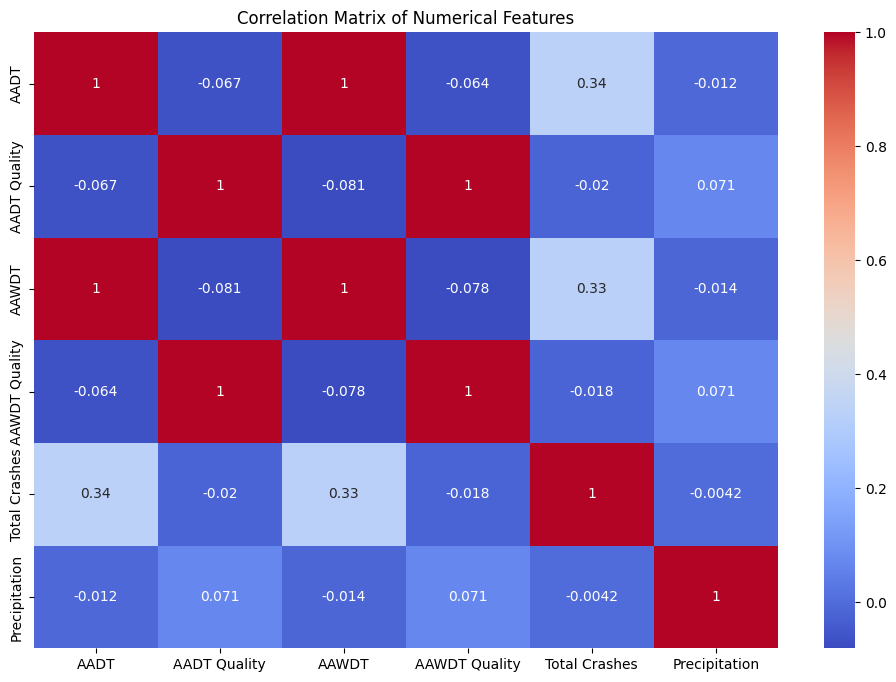

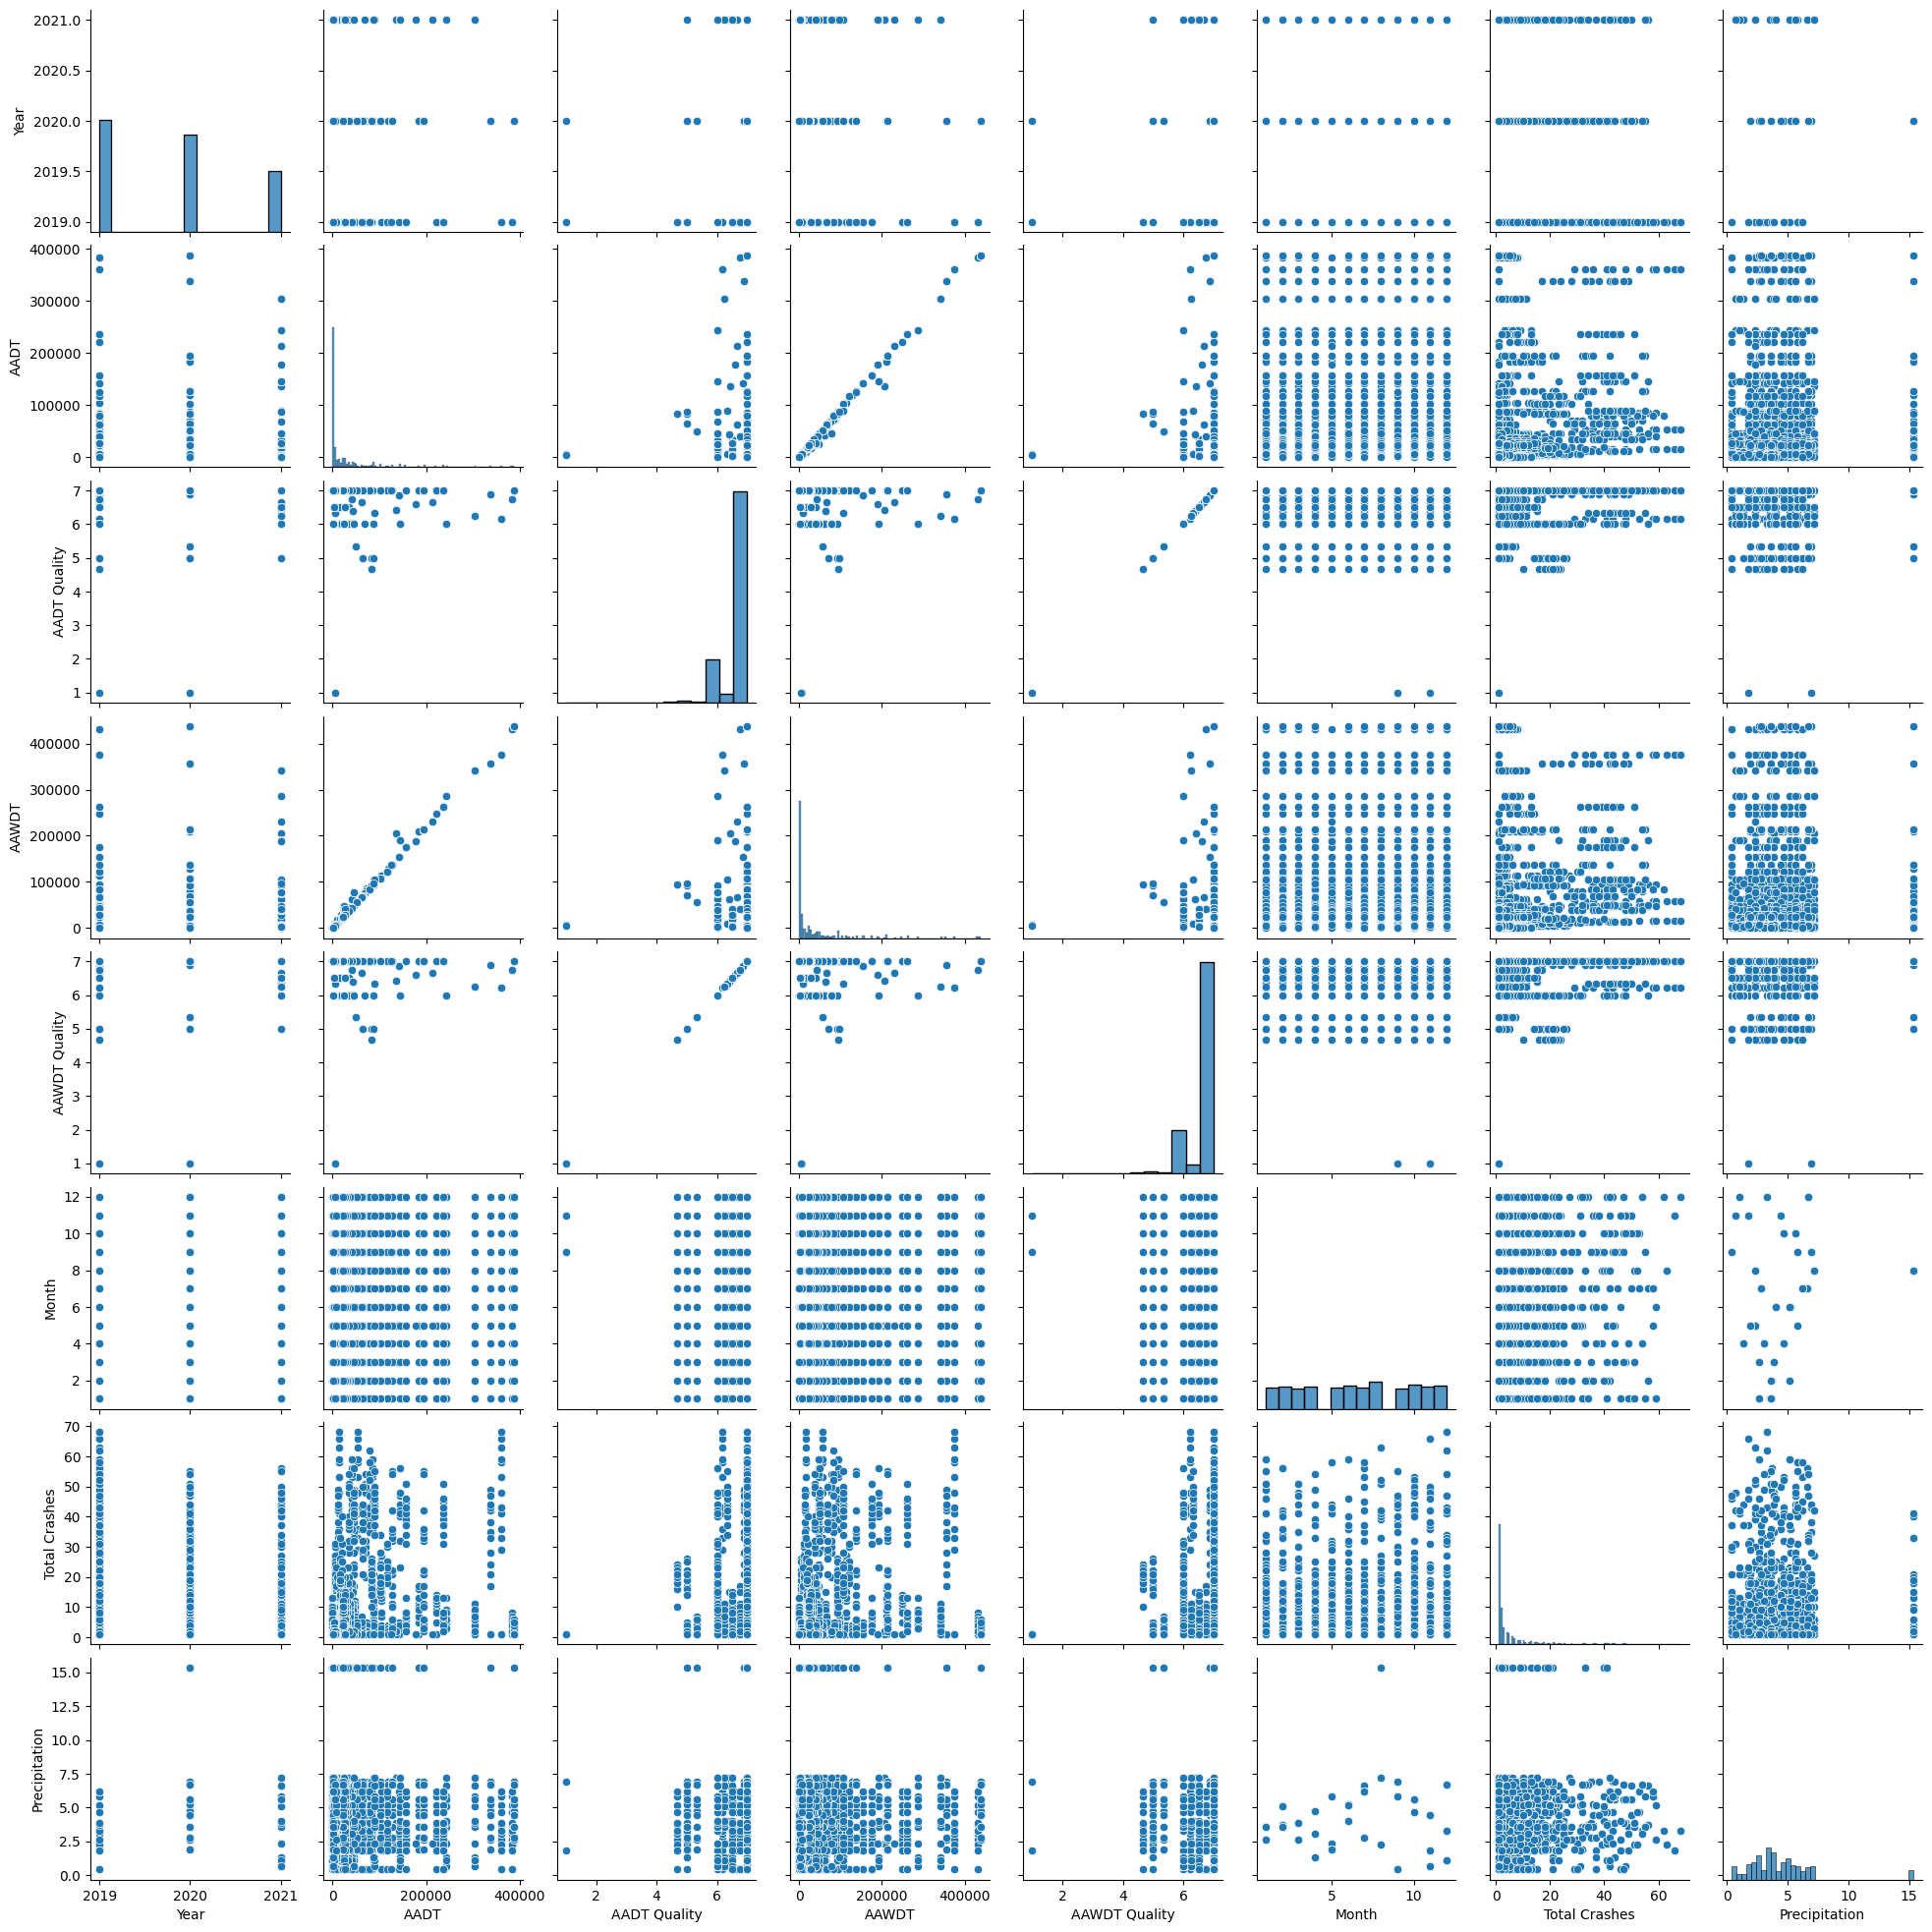

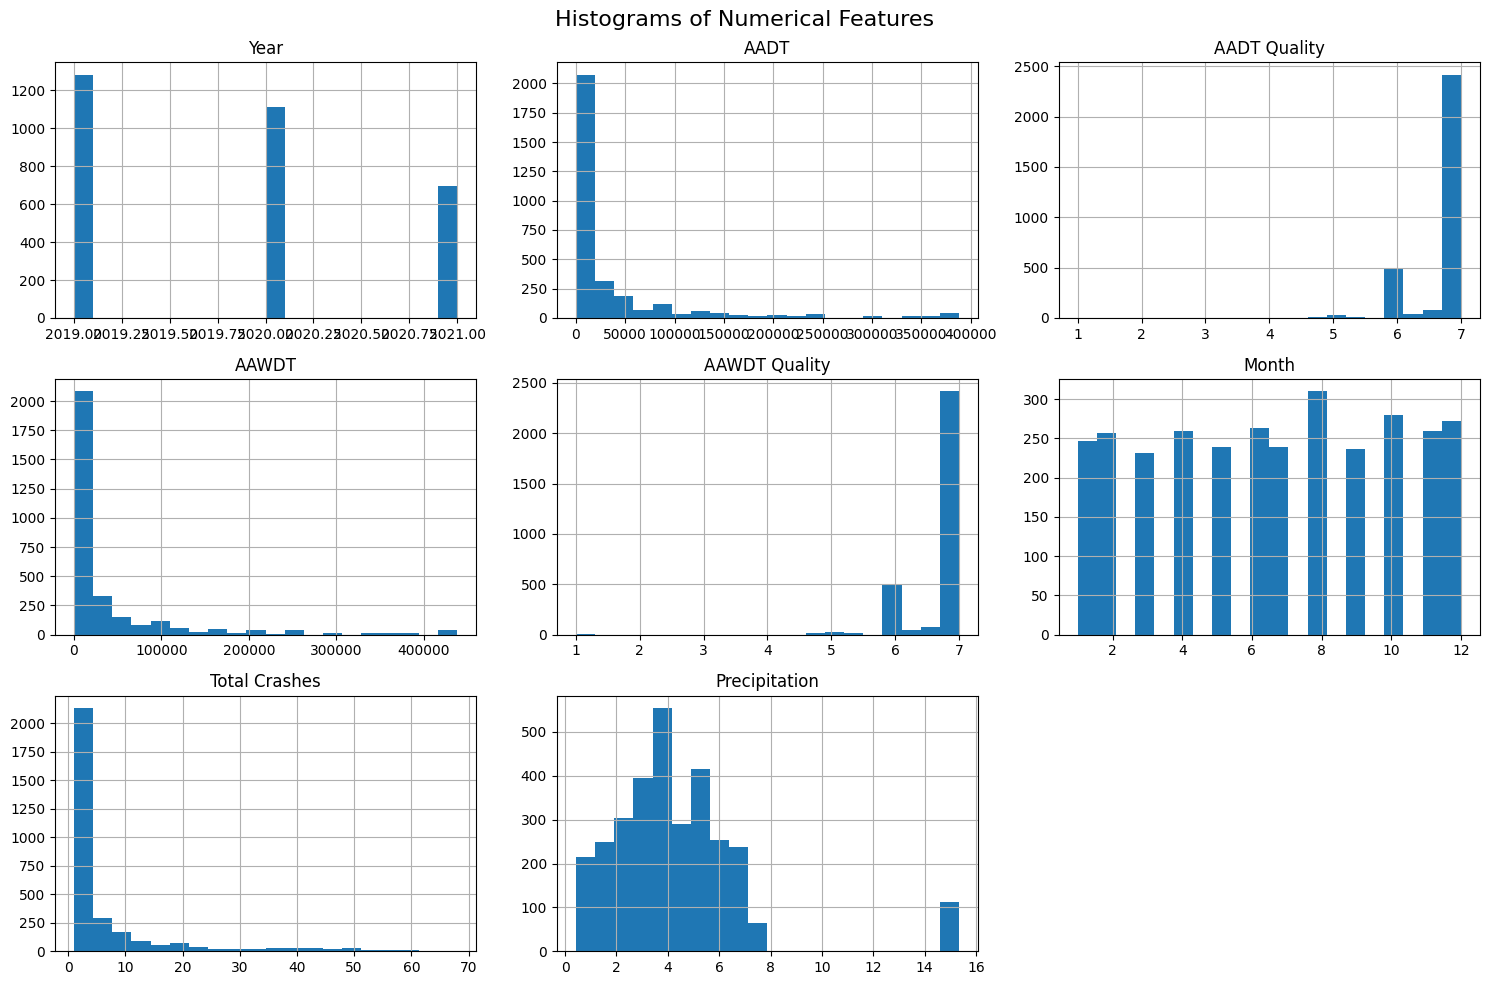

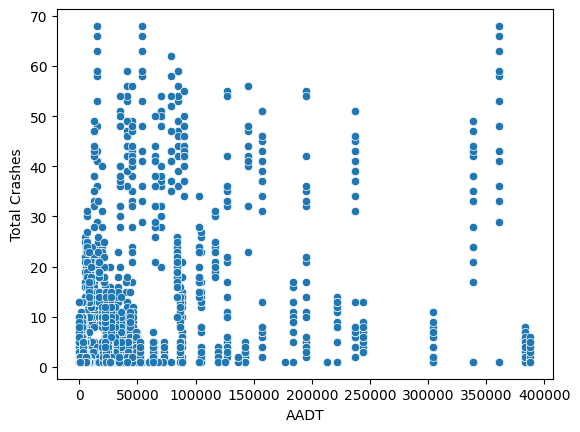

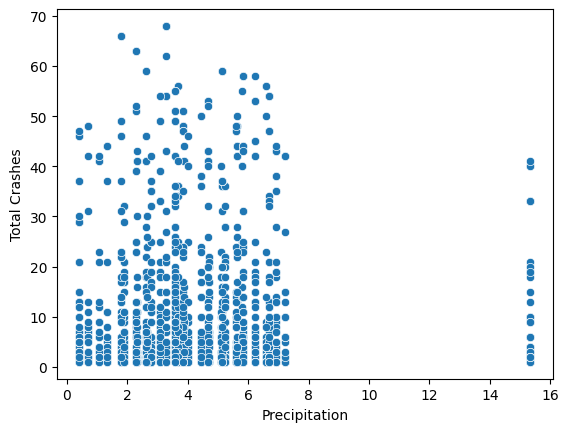

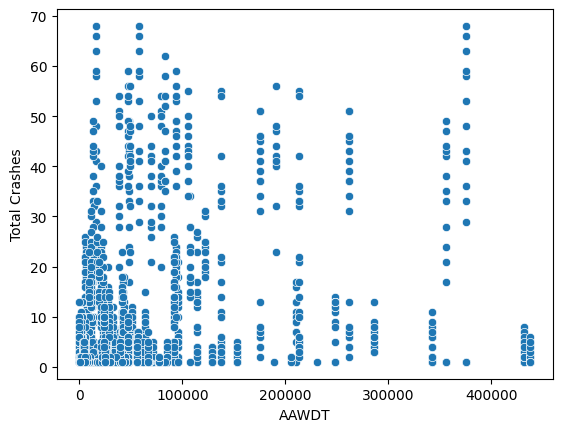

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr_df = merged_df.drop(columns=['Route Alias', 'Year', 'Month'])
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pairplot
sns.pairplot(merged_df)
plt.show()


# Histograms for numerical features
merged_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


# Scatter plots for relationships between numerical features
sns.scatterplot(x='AADT', y='Total Crashes', data=merged_df)
plt.show()

sns.scatterplot(x='Precipitation', y='Total Crashes', data=merged_df)
plt.show()

sns.scatterplot(x='AAWDT', y='Total Crashes', data=merged_df)
plt.show()

## ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = merged_df[['AADT', 'AAWDT', 'Precipitation', 'AADT Quality', 'AAWDT Quality']]
y = merged_df['Total Crashes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print(f"SVR - Mean Squared Error: {svr_mse}, R-squared: {svr_r2}")

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - Mean Squared Error: {rf_mse}, R-squared: {rf_r2}")

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression - Mean Squared Error: {lr_mse}, R-squared: {lr_r2}")

#Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Gradient Boosting - Mean Squared Error: {gb_mse}, R-squared: {gb_r2}")

# Train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluation
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost - Mean Squared Error: {xgb_mse}, R-squared: {xgb_r2}")

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print(f"KNN Regression - Mean Squared Error: {knn_mse}, R-squared: {knn_r2}")

SVR - Mean Squared Error: 133.02803963140582, R-squared: 0.09234014627488818
Random Forest - Mean Squared Error: 60.74674465437348, R-squared: 0.5855206051292641
Linear Regression - Mean Squared Error: 126.88382398815632, R-squared: 0.13426257020490873
Gradient Boosting - Mean Squared Error: 54.60865604139154, R-squared: 0.6274012238924054
XGBoost - Mean Squared Error: 61.165317413333106, R-squared: 0.5826647281646729
KNN Regression - Mean Squared Error: 47.202326332794826, R-squared: 0.6779351425953447


In [ ]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 2472
Testing samples: 619


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11],  # Try different numbers of neighbors
    'weights': ['uniform', 'distance'], # Try different weighting methods
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Try different distance metrics
}

# Create a KNN regressor
knn_model = KNeighborsRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# Get the best model and its hyperparameters
best_knn_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
knn_predictions = best_knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"Optimized KNN Regression - Mean Squared Error: {knn_mse}, R-squared: {knn_r2}")

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}
Optimized KNN Regression - Mean Squared Error: 45.19157242864836, R-squared: 0.6916546606726742


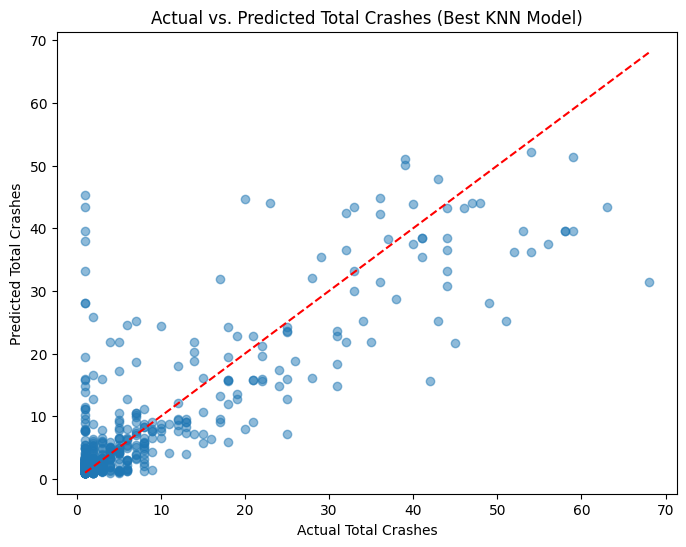

In [ ]:
# prompt: print the best clustering plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions, alpha=0.5)
plt.xlabel("Actual Total Crashes")
plt.ylabel("Predicted Total Crashes")
plt.title("Actual vs. Predicted Total Crashes (Best KNN Model)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.show()

In [ ]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [150, 200, 250],  # Number of boosting stages
    'learning_rate': [0.1, 0.2, 0.3], # Step size shrinkage
    'max_depth': [2, 3, 4], # Maximum depth of the individual regression estimators
    'min_samples_split': [5, 10, 15], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 4, 6] # Minimum number of samples required to be at a leaf node
}

# Create a Gradient Boosting regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_gb_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
gb_predictions = best_gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Optimized Gradient Boosting - Mean Squared Error: {gb_mse}, R-squared: {gb_r2}")

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 250}
Optimized Gradient Boosting - Mean Squared Error: 44.16327552945241, R-squared: 0.6986708041541259


In [ ]:
# prompt: optimize xg boost

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_xgb_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
xgb_predictions = best_xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"Optimized XGBoost - Mean Squared Error: {xgb_mse}, R-squared: {xgb_r2}")

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Optimized XGBoost - Mean Squared Error: 44.2591420580321, R-squared: 0.6980167031288147
